In [1]:
import zipfile
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Concatenate, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, Sequential

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
    return images

# Specify the paths to the folders containing the images
water_folder_path = r"C:\Users\kcrav\trail1\Water"
urban_folder_path = r"C:\Users\kcrav\trail1\Urban & Forest"

# Load images from the water and urban folders
water_images = load_images_from_folder(water_folder_path)
urban_images = load_images_from_folder(urban_folder_path)

# Print the number of images loaded
print("Number of water images loaded:", len(water_images))
print("Number of urban images loaded:", len(urban_images))



Number of water images loaded: 431
Number of urban images loaded: 486


In [4]:
import os
import cv2
import random
import shutil

# Function to load images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Resize the image to the target size
                image = cv2.resize(image, target_size)
                images.append(image)
    return images

# Paths to the folders containing water body and urban area satellite images
water_folder_path = r"C:\Users\kcrav\trail1\Water"
urban_folder_path = r"C:\Users\kcrav\trail1\Urban & Forest"

# Load images from water body and urban area folders
water_images = load_images_from_folder(water_folder_path)
urban_images = load_images_from_folder(urban_folder_path)

# Merge the images from both folders into a single list
merged_images = water_images + urban_images

# Shuffle the list of images
random.shuffle(merged_images)

# Path to the folder to save the shuffled images
merged_folder_path = r"C:\Users\kcrav\trail1\Merged_Dataset"

# Create the folder if it doesn't exist
if not os.path.exists(merged_folder_path):
    os.makedirs(merged_folder_path)

# Save the shuffled images into the new folder
for i, image in enumerate(merged_images):
    cv2.imwrite(os.path.join(merged_folder_path, f"image_{i}.jpg"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print("Merged and shuffled images saved in:", merged_folder_path)
print("Number of water and the urban images loaded:", len(merged_images))

Merged and shuffled images saved in: C:\Users\kcrav\trail1\Merged_Dataset
Number of water and the urban images loaded: 917


In [5]:
#Creating the mask Images

import os
import cv2


def load_images_from_folder(folder_path):
    images, names = [], []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                images.append(gray_image)
                names.append(filename)
    return images, names


# Function to create mask images
def create_mask_images(images, names, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image
    for image, name in zip(images, names):
        # Apply a simple threshold to create a mask (adjust threshold value as needed)
        _, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Save the mask image
        output_path = os.path.join(output_folder, name)
        cv2.imwrite(output_path, mask)

    print(f"All {len(images)} images have been masked and saved in {output_folder}")

# Specify the paths to the folders containing the images
#water_folder_path = r"C:\Users\kcrav\trail1\Water"
#urban_folder_path = r"C:\Users\kcrav\trail1\Urban & Forest"
merged_folder_path=r"C:\Users\kcrav\trail1\Merged_Dataset"

# Load images from the water and urban folders

merged_images, names=load_images_from_folder(merged_folder_path)
create_mask_images(merged_images, names, "merged_masked1")

# Print the number of images loaded
print("Number of images that are been loaded:", len(merged_images))

# Create masked images for water


# Create masked images for urban


All 917 images have been masked and saved in merged_masked1
Number of images that are been loaded: 917


In [6]:

# Resizing the Images.

import os
import cv2
import numpy as np

def load_images_from_folder(folder_path, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Resize the image to the target size
                image = cv2.resize(image, target_size)
                images.append(image)
    return images

# Specify the path to the merged dataset folder
merged_folder_path = r"C:\Users\kcrav\trail1\Merged_Dataset"

# Load and resize images from the merged dataset folder
resized_images = load_images_from_folder(merged_folder_path, target_size=(128, 128))

# Print the number of resized images loaded
print("Number of resized images loaded:", len(resized_images))


Number of resized images loaded: 917


In [7]:
# Resizing the mask images

import os
import cv2

def load_images_from_folder(folder_path, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
            if image is not None:
                # Resize the image to the target size
                image = cv2.resize(image, target_size)
                images.append(image)
    return images

# Specify the path to the folder containing the mask images
merged_masked_folder_path = r"C:\Users\kcrav\trail1\merged_masked1"

# Load and resize mask images from the merged mask folder
resized_masked_images = load_images_from_folder(merged_masked_folder_path)

# Print the number of resized mask images loaded
print("Number of resized mask images loaded:", len(resized_masked_images))


Number of resized mask images loaded: 917


In [8]:
import os
import cv2

def load_images_from_folder(folder_path, target_size=(256, 256)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Original dimensions before resizing
                orig_height, orig_width, _ = image.shape
                # Resize the image to the target size
                image = cv2.resize(image, target_size)
                # Resized dimensions after resizing
                resized_height, resized_width, _ = image.shape
                # Print original and resized dimensions
                print(f"Original dimensions: ({orig_height}, {orig_width})")
                print(f"Resized dimensions: ({resized_height}, {resized_width})")
                images.append(image)
    return images

# Specify the path to the merged dataset folder
merged_dataset_folder_path = r"C:\Users\kcrav\trail1\Merged_Dataset"

# Load and resize images from the merged dataset folder
resized_images = load_images_from_folder(merged_dataset_folder_path)

# Print the number of resized images loaded
print("Number of resized images loaded:", len(resized_images))


Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (25

Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (25

Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (25

Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (25

Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (256, 256)
Original dimensions: (128, 128)
Resized dimensions: (25

In [9]:
#Normalisation of the Dataset
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
    return images

def normalize_images(images):
    normalized_images = []
    for image in images:
        # Convert image to float32 for normalization
        image = image.astype(np.float32)
        # Normalize the image to range [0, 1]
        normalized_image = image / 255.0
        normalized_images.append(normalized_image)
    return normalized_images

# Specify the path to the merged dataset folder
merged_dataset_folder_path = r"C:\Users\kcrav\trail1\Merged_Dataset"

# Load images from the merged dataset folder
merged_images = load_images_from_folder(merged_dataset_folder_path)

# Print the number of images loaded
print("Number of images loaded:", len(merged_images))

# Normalize images
normalized_images = normalize_images(merged_images)


Number of images loaded: 917


In [10]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            if image is not None:
                # Convert the image to RGB (OpenCV reads images in BGR format)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
    return images

def noise_reduction(images):
    denoised_images = []
    for image in images:
        # Apply Gaussian blur for noise reduction
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        denoised_images.append(denoised_image)
    return denoised_images

# Specify the path to the merged dataset folder
merged_dataset_folder_path = r"C:\Users\kcrav\trail1\Merged_Dataset"

# Load images from the merged dataset folder
merged_images = load_images_from_folder(merged_dataset_folder_path)

# Noise reduction for merged images
denoised_images = noise_reduction(merged_images)

# Print the number of images loaded
print("Number of images loaded:", len(denoised_images))


Number of images loaded: 917


In [11]:
import os
import cv2

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Read the image using OpenCV
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
            if image is not None:
                images.append(image)
    return images

def noise_reduction(images):
    denoised_images = []
    for image in images:
        # Apply Gaussian blur for noise reduction
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        denoised_images.append(denoised_image)
    return denoised_images

# Specify the path to the folder containing the masked images
merged_masked_folder_path = r"C:\Users\kcrav\trail1\merged_masked1"

# Load masked images from the merged masked folder
merged_masked_images = load_images_from_folder(merged_masked_folder_path)

# Noise reduction for masked images
denoised_masked_images = noise_reduction(merged_masked_images)

# Print the number of masked images loaded
print("Number of masked images loaded:", len(denoised_masked_images))


Number of masked images loaded: 917


In [12]:
#pip install torchvision

In [13]:
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
import numpy as np
import cv2

In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your dataset folders
satellite_folder = r"C:\Users\kcrav\trail1\Merged_Dataset"
mask_folder = r"C:\Users\kcrav\trail1\merged_masked1"

# Create lists to store file paths
satellite_images = []
mask_images = []

# Iterate over the files in the satellite images folder
for filename in os.listdir(satellite_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust extensions as needed
        satellite_images.append(os.path.join(satellite_folder, filename))

# Iterate over the files in the mask images folder
for filename in os.listdir(mask_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust extensions as needed
        mask_images.append(os.path.join(mask_folder, filename))

# Split the dataset into training and validation sets
train_satellite, val_satellite, train_mask, val_mask = train_test_split(
    satellite_images, mask_images, test_size=0.2, random_state=42)

# Define paths for train and validation datasets
train_satellite_folder = r'C:\Users\kcrav\trail1\train_satellite_folder'
train_mask_folder = r'C:\Users\kcrav\trail1\train_mask_folder'
val_satellite_folder = r'C:\Users\kcrav\trail1\val_satellite_folder'
val_mask_folder = r'C:\Users\kcrav\trail1\val_mask_folder'

# Create directories for train and validation datasets
os.makedirs(train_satellite_folder, exist_ok=True)
os.makedirs(train_mask_folder, exist_ok=True)
os.makedirs(val_satellite_folder, exist_ok=True)
os.makedirs(val_mask_folder, exist_ok=True)

# Copy train images and masks to train folders
for satellite_image, mask_image in zip(train_satellite, train_mask):
    shutil.copy(satellite_image, train_satellite_folder)
    shutil.copy(mask_image, train_mask_folder)

# Copy validation images and masks to validation folders
for satellite_image, mask_image in zip(val_satellite, val_mask):
    shutil.copy(satellite_image, val_satellite_folder)
    shutil.copy(mask_image, val_mask_folder)

print("Dataset split and saved into train and validation folders successfully.")


Dataset split and saved into train and validation folders successfully.


In [15]:
from functools import partial
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [16]:
images_dir = r"C:\Users\kcrav\trail1\Merged_Dataset"
masks_dir = r"C:\Users\kcrav\trail1\merged_masked1"

dirname, _, filenames = next(os.walk(images_dir))

In [17]:
@tf.function
def load_img_with_mask(image_path, images_dir: str = 'Images', masks_dir: str = 'Masks',images_extension: str = 'jpg', masks_extension: str = 'jpg') -> dict:
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    mask_filename = tf.strings.regex_replace(image_path, images_dir, masks_dir)
    mask_filename = tf.strings.regex_replace(mask_filename, images_extension, masks_extension)
    mask = tf.io.read_file(mask_filename)
    mask = tf.image.decode_image(mask, channels=1, expand_animations = False)
    return (image, mask)

''

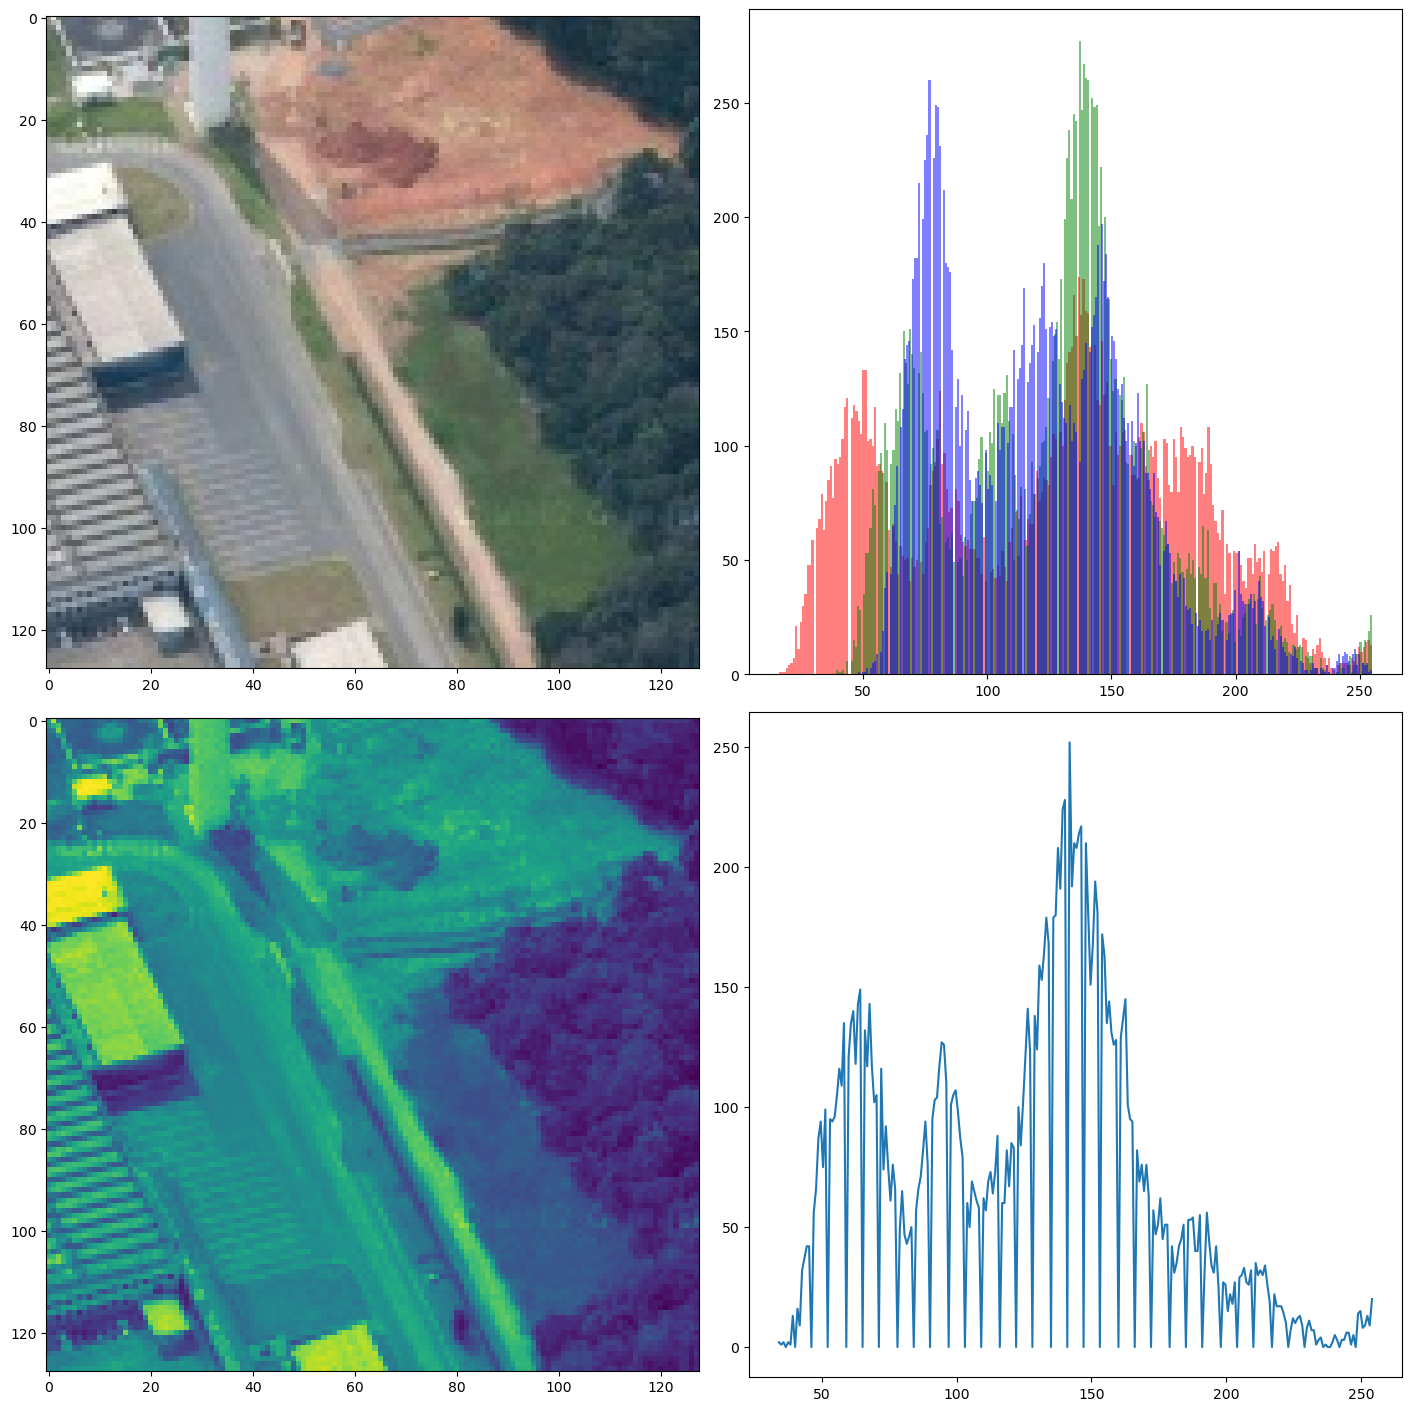

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), constrained_layout=True)
example_image, example_mask = examples[0]
example_image = np.array(example_image)
example_mask = np.squeeze(example_mask)
axs[0][0].imshow(example_image)
axs[0][1].hist(example_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
axs[0][1].hist(example_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
axs[0][1].hist(example_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)

axs[1][0].imshow(example_mask)
histogram, bin_edges = np.histogram(example_mask, bins=256)
axs[1][1].plot(bin_edges[0:-1], histogram)
;

In [21]:
@tf.function
def resize_images(images, masks, max_image_size=1500):
    shape = tf.shape(images)
    scale = (tf.reduce_max(shape) // max_image_size) + 1
    target_height, target_width = shape[-3] // scale, shape[-2] // scale
    images = tf.cast(images, tf.float32)
    masks = tf.cast(masks, tf.float32)
    if scale != 1:
        images = tf.image.resize(images, (target_height, target_width), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        masks = tf.image.resize(masks, (target_height, target_width), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return (images, masks)

@tf.function
def scale_values(images, masks, mask_split_threshold = 128):
    images = tf.math.divide(images, 255)
    masks = tf.where(masks > mask_split_threshold, 1, 0)
    return (images, masks)

@tf.function
def pad_images(images, masks, pad_mul=16, offset=0):
    shape = tf.shape(images)
    height, width = shape[-3], shape[-2]
    target_height = height + tf.math.floormod(tf.math.negative(height), pad_mul)
    target_width = width + tf.math.floormod(tf.math.negative(width), pad_mul)
    images = tf.image.pad_to_bounding_box(images, offset, offset, target_height, target_width)
    masks = tf.cast(tf.image.pad_to_bounding_box(masks, offset, offset, target_height, target_width), tf.uint8)
    return (images, masks)

In [22]:
batch_size = 32
test_set_size = 300
validation_set_size = 250

dataset = tf.data.Dataset.list_files(images_dir + '/*.jpg', seed=42)

test_dataset = dataset.take(test_set_size)
dataset = dataset.skip(test_set_size)
test_dataset = test_dataset.map(load_img_with_mask)
test_dataset = test_dataset.map(scale_values)
test_dataset = test_dataset.shuffle(20)
test_dataset = test_dataset.map(lambda img, mask: resize_images(img, mask, max_image_size=2500))
test_dataset = test_dataset.map(pad_images)
test_dataset = test_dataset.batch(1).prefetch(5)


validation_dataset = dataset.take(validation_set_size)
train_dataset = dataset.skip(validation_set_size)
validation_dataset = validation_dataset.map(load_img_with_mask)
validation_dataset = validation_dataset.map(scale_values)
validation_dataset = validation_dataset.shuffle(20)
validation_dataset = validation_dataset.map(resize_images)
validation_dataset = validation_dataset.map(pad_images)
validation_dataset = validation_dataset.batch(1).prefetch(5)

train_dataset = train_dataset.map(load_img_with_mask)
train_dataset = train_dataset.map(scale_values)
train_dataset = train_dataset.shuffle(20)
train_dataset = train_dataset.map(resize_images)
train_dataset = train_dataset.map(pad_images)
train_dataset = train_dataset.batch(1).prefetch(5)

In [23]:
def get_unet(hidden_activation='relu', initializer='he_normal', output_activation='sigmoid'):
    PartialConv = partial(keras.layers.Conv2D,
     activation=hidden_activation,
     kernel_initializer=initializer,      
     padding='same')
    
    # Encoder
    model_input = keras.layers.Input(shape=(None, None, 3))
    enc_cov_1 = PartialConv(32, 3)(model_input)
    enc_cov_1 = PartialConv(32, 3)(enc_cov_1)
    enc_pool_1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(enc_cov_1)
    
    enc_cov_2 = PartialConv(64, 3)(enc_pool_1)
    enc_cov_2 = PartialConv(64, 3)(enc_cov_2)
    enc_pool_2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(enc_cov_2)
    
    enc_cov_3 = PartialConv(128, 3)(enc_pool_2)
    enc_cov_3 = PartialConv(128, 3)(enc_cov_3)
    enc_pool_3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(enc_cov_3)
    
    # Center
    center_cov = PartialConv(256, 3)(enc_pool_3)
    center_cov = PartialConv(256, 3)(center_cov)
    
    # Decoder
    upsampling1 = keras.layers.UpSampling2D(size=(2, 2))(center_cov)
    dec_up_conv_1 = PartialConv(128, 2)(upsampling1)
    dec_merged_1 = tf.keras.layers.Concatenate(axis=3)([enc_cov_3, dec_up_conv_1])
    dec_conv_1 = PartialConv(128, 3)(dec_merged_1)
    dec_conv_1 = PartialConv(128, 3)(dec_conv_1)
    
    upsampling2 = keras.layers.UpSampling2D(size=(2, 2))(dec_conv_1)
    dec_up_conv_2 = PartialConv(64, 2)(upsampling2)
    dec_merged_2 = tf.keras.layers.Concatenate(axis=3)([enc_cov_2, dec_up_conv_2])
    dec_conv_2 = PartialConv(64, 3)(dec_merged_2)
    dec_conv_2 = PartialConv(64, 3)(dec_conv_2)
    
    upsampling3 = keras.layers.UpSampling2D(size=(2, 2))(dec_conv_2)
    dec_up_conv_3 = PartialConv(32, 2)(upsampling3)
    dec_merged_3 = tf.keras.layers.Concatenate(axis=3)([enc_cov_1, dec_up_conv_3])
    dec_conv_3 = PartialConv(32, 3)(dec_merged_3)
    dec_conv_3 =  PartialConv(32, 3)(dec_conv_3)
    
    output = keras.layers.Conv2D(1, 1, activation=output_activation)(dec_conv_3)
    
    return tf.keras.Model(inputs=model_input, outputs=output)

In [24]:
model = get_unet()

optimizer = tf.keras.optimizers.Nadam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'precision', 'recall'])

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, None, None, 32)    │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, None, None, 32)    │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, None, None, 32)    │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, None, None, 64)    │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, None, None, 64)    │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, None, None, 64)    │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, None, None, 128)   │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, None, None, 128)   │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, None, None, 128)   │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, None, None, 256)   │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, None, None, 256)   │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d (UpSampling2D)  │ (None, None, None, 256)   │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, None, None, 128)   │         131,200 │ up_sampling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, None, None, 256)   │               0 │ conv2d_5[0][0],            │
│                               │                           │                 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, None, None, 128)   │         295,04

 Total params: 1,925,601 (7.35 MB)

 Trainable params: 1,925,601 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

epochs = 10
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, callbacks=[early_stopping, lr_reduce])

Epoch 1/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 132s 312ms/step - accuracy: 0.8451 - loss: 0.4607 - precision: 0.3761 - recall: 0.1960 - val_accuracy: 0.9480 - val_loss: 0.1610 - val_precision: 0.8633 - val_recall: 0.7860 - learning_rate: 0.0010
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 114s 311ms/step - accuracy: 0.9331 - loss: 0.1585 - precision: 0.7683 - recall: 0.7436 - val_accuracy: 0.9078 - val_loss: 0.2033 - val_precision: 0.6175 - val_recall: 0.9891 - learning_rate: 0.0010
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 113s 308ms/step - accuracy: 0.9579 - loss: 0.1032 - precision: 0.8565 - recall: 0.8419 - val_accuracy: 0.9529 - val_loss: 0.0969 - val_precision: 0.7726 - val_recall: 0.9865 - learning_rate: 0.0010
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 110s 300ms/step - accuracy: 0.9632 - loss: 0.0894 - precision: 0.8880 - recall: 0.8569 - val_accuracy: 0.9820 - val_loss: 0.0449 - val_precision: 0.9255 - val_recall: 0.9568 - learning_rate: 0.0010
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 141s 383

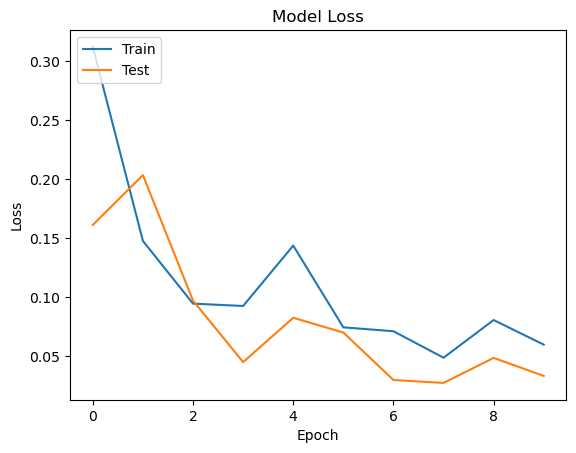

In [27]:
model.save('MiniProject1.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


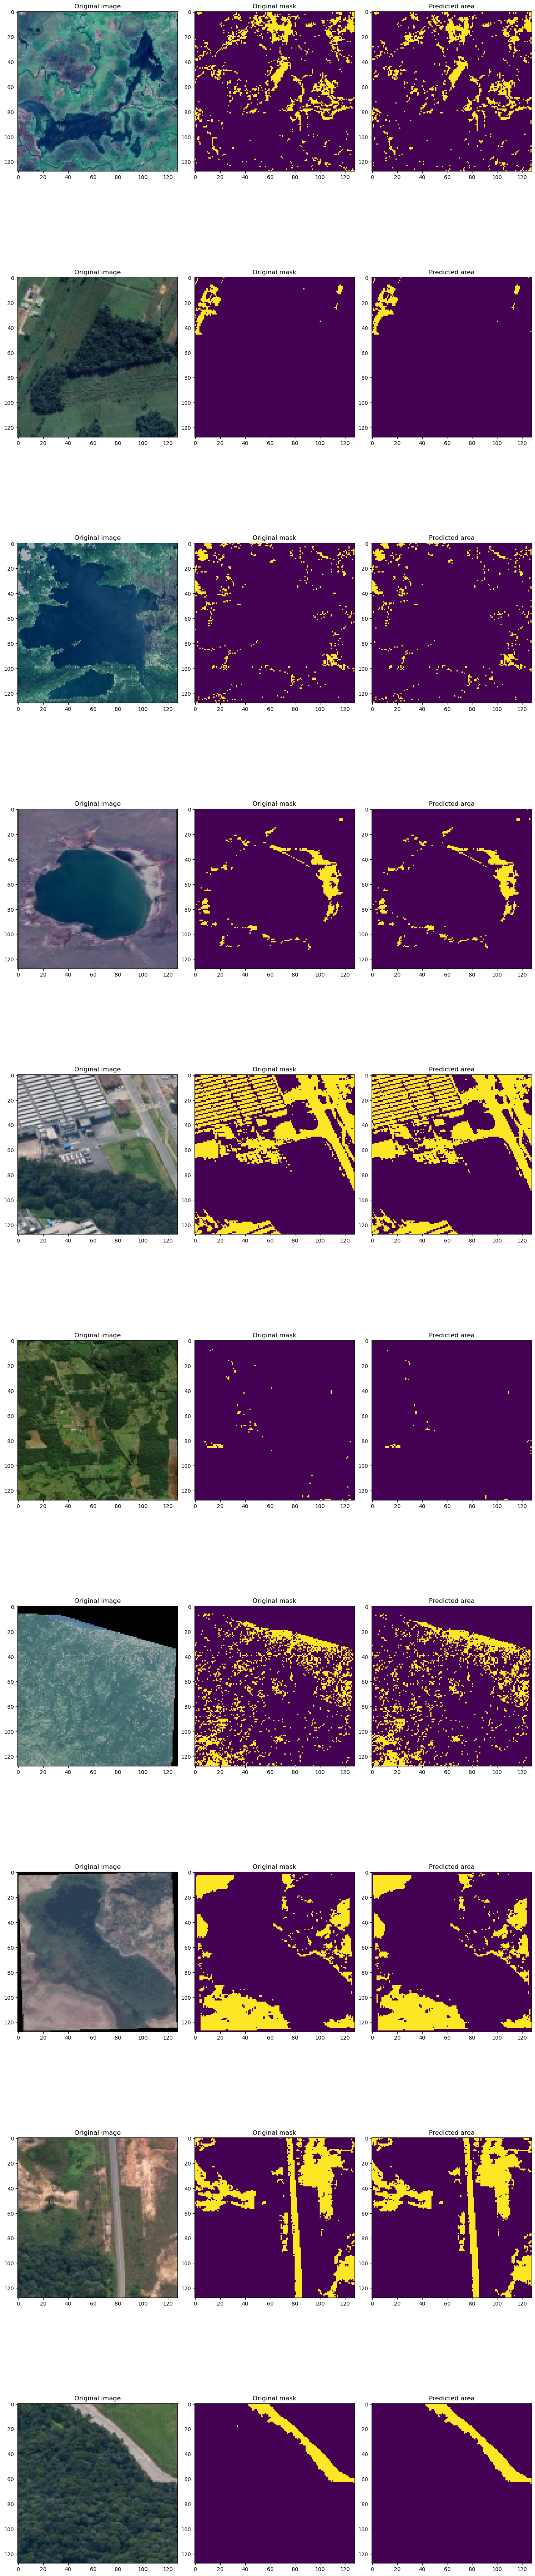

In [28]:
n_examples = 10

fig, axs = plt.subplots(n_examples, 3, figsize=(14, n_examples*7), constrained_layout=True)
for ax, ele in zip(axs, test_dataset.take(n_examples)):
    image, y_true = ele
    prediction = model.predict(image)[0]
    prediction = tf.where(prediction > 0.5, 255, 0)
    ax[0].set_title('Original image')
    ax[0].imshow(image[0])
    ax[1].set_title('Original mask')
    ax[1].imshow(y_true[0])
    ax[2].set_title('Predicted area')
    ax[2].imshow(prediction)

In [29]:
meanIoU = tf.keras.metrics.MeanIoU(num_classes=2)
for ele in test_dataset.take(test_set_size):
    image, y_true = ele
    prediction = model.predict(image)[0]
    prediction = tf.where(prediction > 0.5, 1, 0)
    meanIoU.update_state(y_true[0], prediction)
print(meanIoU.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [30]:
def calculate_water(predicted_mask):
    white = len(predicted_mask[predicted_mask >= 0.5])
    black = len(predicted_mask[predicted_mask < 0.5])
    total_pixels = white + black
    
    # Handle the case where the total number of pixels is zero
    if total_pixels == 0:
        return 0.0
    
    water_percentage = white / total_pixels
    return round(water_percentage, 5)

In [31]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

# Compile the model with desired metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[Accuracy(), Precision(), Recall()])  # Add any other metrics you want


In [32]:
import cv2
from PIL import Image
from tensorflow.keras.models import load_model
from torchvision import transforms

# Define function to load and preprocess an image
import numpy as np

def load_and_preprocess_image(image_path, target_size):
    # Load image as RGB (adjust if grayscale needed)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Convert numpy array to PIL Image
    image = Image.fromarray(image)

    # Define transformations (resize to your model's input size, convert to tensor)
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])
    transformed_image = transform(image)  # Remove unsqueeze(0)

    # Transpose dimensions to match TensorFlow's convention (batch_size, height, width, channels)
    transformed_image = transformed_image.permute(1, 2, 0)

    # Add batch dimension
    transformed_image = np.expand_dims(transformed_image, axis=0)

    return transformed_image

# Function to make prediction (replace with your model's logic if needed)
def make_prediction(image_tensor, model):
    # Assuming your model expects preprocessed image tensor
    predicted_mask = model.predict(image_tensor)  # Get predictions from your model

    # Modify this if your model's output structure differs or requires post-processing
    return predicted_mask[0]  # Assuming predictions are in the first element

# Load your saved model weights (replace with your model loading path)
model_path = r"C:\Users\kcrav\trail1\MiniProject1.h5"  # Replace with your model filename
model = load_model(model_path)

# Get the image path
image_path = r"C:\DHATHRI\Mini Project\FD Testing DataSet\sanjuan_oli2_2022218  before.jpg" # Replace with your image path

# Define the target size for resizing
your_model_input_size = (256, 256)

# Load and preprocess the image
image_tensor = load_and_preprocess_image(image_path, your_model_input_size)

# Make prediction
predicted_mask = make_prediction(image_tensor, model)

# Calculate water percentage
# Assuming the calculate_water function is defined elsewhere
water_percentage = calculate_water(predicted_m ask.squeeze())  # Remove batch dimension

# Classify based on water percentage threshold
if water_percentage > 0.015:
    print(f"Image likely contains a water body: {water_percentage:.2f}% water percentage.")
else:
    print(f"Image likely contains forest/urban area: {water_percentage:.2f}% water percentage.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image likely contains a water body: 0.77% water percentage.


In [33]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)